# FDA_HW3

E94041220 郭濯瑀

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

# preprocess dataset

### LOAD資料

In [2]:
data = pd.read_csv('data_HW3.csv')
data.head()


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


### 將Date轉成年-月-日

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952


### 利用收盤價建立漲跌資料
#### 今日收盤價-昨日收盤價 >0 :為漲(value=1) ； <0:為跌(value=0)

In [4]:
value = pd.Series(data['Close Price'] - data['Close Price'].shift(1),\
                  index = data.index)
value = value.bfill()
value[value >= 0] = 1 
value[value < 0] = 0 
data['Value'] = value
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Value
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080,0.0
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016,0.0
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032,1.0
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032,0.0
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952,1.0


### 將Data分成train和test資料

* train資料:02-Jan-2009 to 29-Dec-2017
* test資料:02-Jan-2018 to 31-Dec-2018

In [5]:
data_train = data[data['Date'].dt.year < 2018]
data_test = data[data['Date'].dt.year == 2018]

print(data_train.head())
print(data_test.head())


        Date  Open Price  Close Price  High Price  Low Price      Volume  \
0 2009-01-02      902.99       931.80      934.73     899.35  4048270080   
1 2009-01-05      929.17       927.45      936.63     919.53  5413910016   
2 2009-01-06      931.17       934.70      943.85     927.28  5392620032   
3 2009-01-07      927.45       906.65      927.45     902.37  4704940032   
4 2009-01-08      905.73       909.73      910.00     896.81  4991549952   

   Value  
0    0.0  
1    0.0  
2    1.0  
3    0.0  
4    1.0  
           Date  Open Price  Close Price  High Price  Low Price      Volume  \
2264 2018-01-02     2683.73      2695.81     2695.89    2682.36  1846463232   
2265 2018-01-03     2697.85      2713.06     2714.37    2697.77  2090595328   
2266 2018-01-04     2719.31      2723.99     2729.29    2719.07  2100767744   
2267 2018-01-05     2731.33      2743.15     2743.45    2727.92  1918869120   
2268 2018-01-08     2742.67      2747.71     2748.51    2737.60  1894823936   

  

* training的資料2264筆
* test的資料252筆

In [6]:
data_train.shape

(2264, 7)

In [7]:
data_test.shape

(252, 7)

### 利用這些當成資料的feature
* Open Price
* Close Price
* High Price
* Low Price 
* Volume

### 漲跌(value)當成target

In [8]:
x_train = data_train[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_train = data_train['Value']
x_test = data_test[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_test = data_test['Value']

#y_train.shape
one = 0
zero = 0
for i in y_train:
    if (i == 1):
        one = one + 1
    else:
        zero = zero + 1
print(one,zero)
    
   

1239 1025


In [9]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
    #print(train_preds)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
evaluate(clf, x_train, y_train, x_test, y_test)
#print(clf)

Train accuracy: 0.5472614840989399
Test accuracy: 0.5277777777777778


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 由結果看出準確度並不高

## SVM



* 由於SVM維度太高的話會跑不動，因此我drop掉Volume這個feature

In [11]:
from sklearn.preprocessing import StandardScaler

x_train_svm = x_train.drop(['Volume'],axis=1)
x_test_svm = x_test.drop(['Volume'],axis=1)

scaler = StandardScaler()
scaler.fit(x_train_svm)

x_train_std = scaler.transform(x_train_svm)
x_test_std = scaler.transform(x_test_svm)

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.metrics import accuracy_score


# Custom kernel function
def my_kernel(X, Y):
    return np.dot(X, Y.T)
  
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_svm, y_train)
  
acc_rate = accuracy_score(y_test.values, svm.predict(x_test_svm)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.05, Accuracy = 82.14 %


* 發現SVM這個方法準確率較logistic高出許多，大約8成

### 因此我利用標準化過的data再跑一次，結果準確度下降了

In [14]:
svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test.values, svm.predict(x_test_std)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.05, Accuracy = 52.78 %


## NN

#### 一開始先利用preprocessing normalize資料，搭建一層hidden layer, 10個unit

In [15]:
from sklearn import model_selection, preprocessing
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [16]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 10          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [17]:
from keras import models, layers, optimizers, regularizers
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [18]:
class_weight = {
    0: 1.,
    1: 1239 / 1025
}

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 0s 114us/step - loss: 0.7570 - acc: 0.5473
Epoch 2/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7546 - acc: 0.5473
Epoch 3/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7542 - acc: 0.5473
Epoch 4/10
2264/2264 [==============================] - 0s 27us/step - loss: 0.7555 - acc: 0.5473
Epoch 5/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7572 - acc: 0.5473
Epoch 6/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7561 - acc: 0.5473
Epoch 7/10
2264/2264 [==============================] - 0s 26us/step - loss: 0.7554 - acc: 0.5473
Epoch 8/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7543 - acc: 0.5473
Epoch 9/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7539 - acc: 0.5473
Epoch 10/10
252/252 [==============================] - 0s 16us/step
T

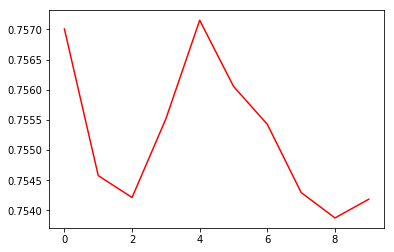

In [19]:

# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

* 發現準確度並不高

In [20]:
print(x_train)

[[2.23055770e-07 2.30172390e-07 2.30896156e-07 2.22156621e-07
  1.00000000e+00]
 [1.71626421e-07 1.71308721e-07 1.73004353e-07 1.69845823e-07
  1.00000000e+00]
 [1.72674877e-07 1.73329475e-07 1.75026239e-07 1.71953521e-07
  1.00000000e+00]
 ...
 [2.33407058e-06 2.33452311e-06 2.33715123e-06 2.33129452e-06
  1.00000000e+00]
 [2.38533363e-06 2.38661239e-06 2.38671895e-06 2.38230545e-06
  1.00000000e+00]
 [2.01831465e-06 2.00665126e-06 2.02054376e-06 2.00665126e-06
  1.00000000e+00]]


* print出nomorlize過的資料，發現值都是正數
* 但是NN主要會先將資料正規為-1到+1之間
* 因此，我將資料*2-1再跑一次

Epoch 1/10
2264/2264 [==============================] - 0s 133us/step - loss: 0.7627 - acc: 0.5446
Epoch 2/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7538 - acc: 0.5473
Epoch 3/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7548 - acc: 0.5473
Epoch 4/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7542 - acc: 0.5473
Epoch 5/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7545 - acc: 0.5473
Epoch 6/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7539 - acc: 0.5473
Epoch 7/10
2264/2264 [==============================] - 0s 27us/step - loss: 0.7549 - acc: 0.5473
Epoch 8/10
2264/2264 [==============================] - 0s 25us/step - loss: 0.7541 - acc: 0.5473
Epoch 9/10
2264/2264 [==============================] - 0s 27us/step - loss: 0.7543 - acc: 0.5473
Epoch 10/10
252/252 [==============================] - 0s 16us/step
Training accuracy: 0.5472614842042485
Testing acc

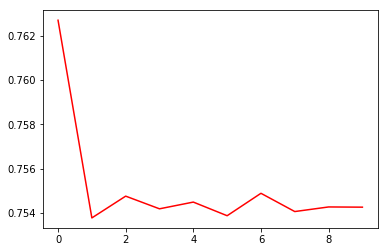

In [21]:
x_train = x_train*2-1
x_test = x_test*2-1
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

class_weight = {
    0: 1.,
    1: 1239 / 1025
}


# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [22]:
print(x_train)

[[-0.99999955 -0.99999954 -0.99999954 -0.99999956  1.        ]
 [-0.99999966 -0.99999966 -0.99999965 -0.99999966  1.        ]
 [-0.99999965 -0.99999965 -0.99999965 -0.99999966  1.        ]
 ...
 [-0.99999533 -0.99999533 -0.99999533 -0.99999534  1.        ]
 [-0.99999523 -0.99999523 -0.99999523 -0.99999524  1.        ]
 [-0.99999596 -0.99999599 -0.99999596 -0.99999599  1.        ]]


* 發現準確度還是不太高

#### 因此決定加深層數

Epoch 1/10
2264/2264 [==============================] - 0s 153us/step - loss: 0.7590 - acc: 0.5437
Epoch 2/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7551 - acc: 0.5473
Epoch 3/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7554 - acc: 0.5473
Epoch 4/10
2264/2264 [==============================] - 0s 29us/step - loss: 0.7538 - acc: 0.5473
Epoch 5/10
2264/2264 [==============================] - 0s 28us/step - loss: 0.7579 - acc: 0.5428
Epoch 6/10
2264/2264 [==============================] - 0s 20us/step - loss: 0.7555 - acc: 0.5473
Epoch 7/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.7540 - acc: 0.5473
Epoch 8/10
2264/2264 [==============================] - 0s 26us/step - loss: 0.7560 - acc: 0.5473
Epoch 9/10
2264/2264 [==============================] - 0s 31us/step - loss: 0.7544 - acc: 0.5473
Epoch 10/10
252/252 [==============================] - 0s 24us/step
Training accuracy: 0.5472614842042485
Testing acc

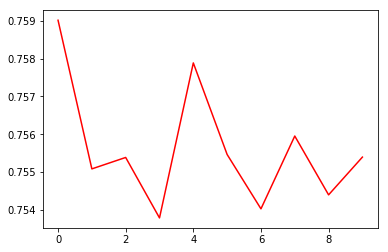

In [24]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=40, 
                       activation=activation))


# add the output layer
model.add(layers.Dense(input_dim=40,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

class_weight = {
    0: 1.,
    1: 1239 / 1025
}


# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

* 發現準確度還是不太高

# Report

利用Logistic Regression, SVM, Neural Network 這三種模型預測股票都不是很準確，只有在SVM拿掉volume這個feature才稍微準確一點，因此由這可知這些feature並不能夠預測股票的漲跌，可能還是跟當時的股市有極大的關西
